In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler
plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
data_frame = pd.read_pickle('./data/clean.pkl')
data_frame.head(5)

,city,district,neighborhood,prop_type,rooms,living_room,price,last_edit,area,prop_floor,...,furniture_availability,bathrooms,building_type,building_status,usage_status,deed,swap,student_single,facade,fuel_type
0,İstanbul,Şişli,Fulya,Daire,3,1,980000,0,140.0,8,...,Eşyalı Değil,2,Betonarme,2,Boş,Kat Mülkiyeti,3,Evet,Güney,Doğalgaz
1,İstanbul,Beşiktaş,Gayrettepe,Daire,3,1,900000,0,110.0,9,...,Eşyalı Değil,1,Betonarme,2,Boş,Kat Mülkiyeti,3,Evet,Kuzey,Doğalgaz
2,İstanbul,Ümraniye,Yamanevler,Daire,3,1,1890000,0,178.0,11,...,Eşyalı Değil,2,Betonarme,3,Ev Sahibi Oturuyor,Kat Mülkiyeti,3,Evet,Güney,Doğalgaz
4,İstanbul,Avcılar,Mustafa Kemal Paşa,Daire,4,1,329000,0,155.0,3,...,Eşyalı Değil,1,Betonarme,3,Boş,Kat Mülkiyeti,1,Evet,Güney,Doğalgaz
5,İstanbul,Şişli,Harbiye,Residence,1,1,5000000,0,121.0,22,...,Eşyalı Değil,1,Betonarme,2,Boş,Kat Mülkiyeti,3,Evet,Güney,Doğalgaz


In [3]:
rooms_index = data_frame[data_frame.rooms>6].index
data_frame.drop(rooms_index, inplace=True)

In [4]:
living_room_index = data_frame[data_frame.living_room>3].index
data_frame.drop(living_room_index, inplace=True)

In [5]:
building_age_index = data_frame[data_frame.building_age>30].index
data_frame.drop(building_age_index, inplace=True)

In [6]:
area_index_upper = data_frame[(data_frame.area>250)].index
data_frame.drop(area_index_upper, inplace=True)

In [7]:
area_index_lower = data_frame[(data_frame.area<50)].index
data_frame.drop(area_index_lower, inplace=True)

In [8]:
prop_floor_index = data_frame[data_frame.prop_floor>22].index
data_frame.drop(prop_floor_index, inplace=True)

In [9]:
building_floors_index = data_frame[data_frame.building_floors>25].index
data_frame.drop(building_floors_index, inplace=True)

In [10]:
last_edit_index = data_frame[data_frame.last_edit>60].index
data_frame.drop(last_edit_index, inplace=True)

In [11]:
price_index_upper = data_frame[data_frame.price>20000000].index
data_frame.drop(price_index_upper, inplace=True)
price_index_lower = data_frame[data_frame.price<1.000000e+05].index
data_frame.drop(price_index_lower, inplace=True)

In [12]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15974 entries, 0 to 25118
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    15974 non-null  object 
 1   district                15974 non-null  object 
 2   neighborhood            15974 non-null  object 
 3   prop_type               15974 non-null  object 
 4   rooms                   15974 non-null  int64  
 5   living_room             15974 non-null  int64  
 6   price                   15974 non-null  int64  
 7   last_edit               15974 non-null  int64  
 8   area                    15974 non-null  float64
 9   prop_floor              15974 non-null  int64  
 10  building_age            15974 non-null  int64  
 11  heating_type            15974 non-null  int64  
 12  building_floors         15974 non-null  int64  
 13  credit_availability     15974 non-null  object 
 14  furniture_availability  15974 non-null

In [13]:
data_frame.describe()

,rooms,living_room,price,last_edit,area,prop_floor,building_age,heating_type,building_floors,bathrooms,building_status,swap
count,15974.00000,15974.000000,1.597400e+04,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000
mean,2.62126,1.063791,1.121911e+06,10.676912,129.441718,4.576249,8.943345,3.362151,6.898961,1.520846,2.380180,2.486854
std,0.92587,0.256390,1.385386e+06,9.336907,45.347603,3.429889,10.487276,0.754293,4.272703,0.871316,0.492996,0.709416
min,1.00000,0.000000,1.000000e+05,0.000000,50.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.00000,1.000000,3.955000e+05,4.000000,95.000000,2.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000
50%,3.00000,1.000000,6.400000e+05,8.000000,120.000000,4.000000,4.000000,3.000000,5.000000,1.000000,2.000000,3.000000
75%,3.00000,1.000000,1.270000e+06,16.000000,155.000000,6.000000,17.000000,3.000000,9.000000,2.000000,3.000000,3.000000
max,6.00000,3.000000,1.870000e+07,60.000000,250.000000,22.000000,30.000000,5.000000,25.000000,29.000000,3.000000,3.000000


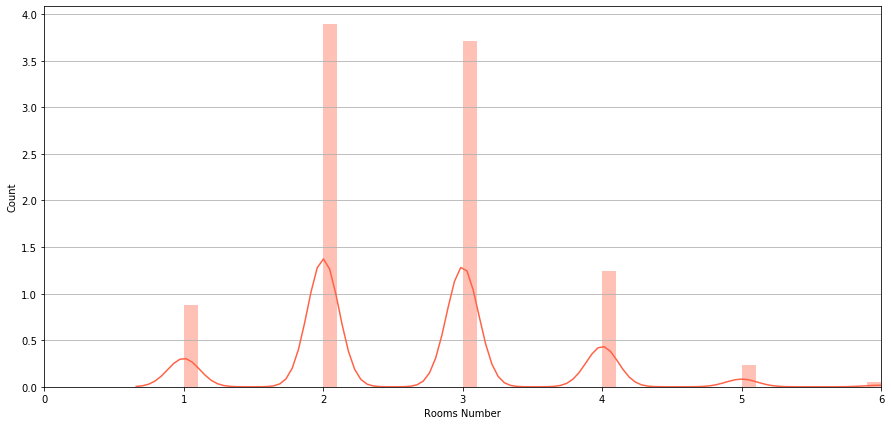

In [14]:
fig, ax = plt.subplots(figsize=[15,7])
ax = sns.distplot(data_frame["rooms"], color='tomato')
plt.xlim([0,6])
ax.grid(axis='y')
plt.xlabel("Rooms Number")
plt.ylabel("Count")
plt.show()

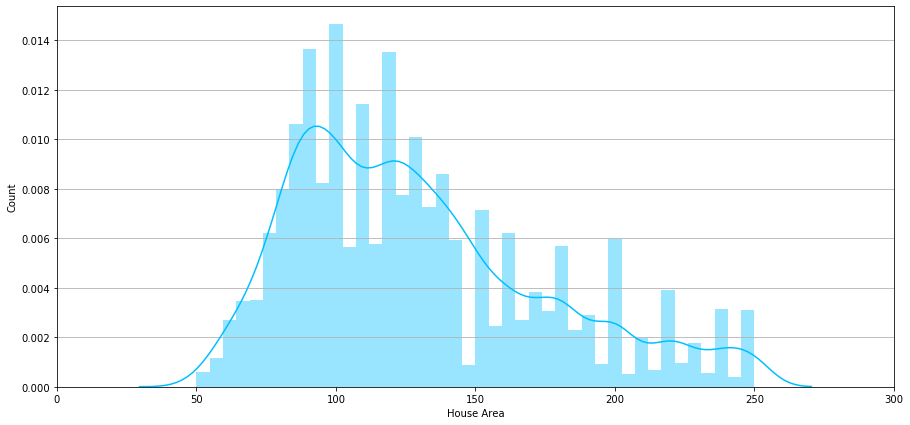

In [15]:
fig, ax = plt.subplots(figsize=[15,7])
ax = sns.distplot(data_frame["area"], color='deepskyblue')
plt.xlim([0,300])
ax.grid(axis='y')
plt.xlabel("House Area")
plt.ylabel("Count")
plt.show()

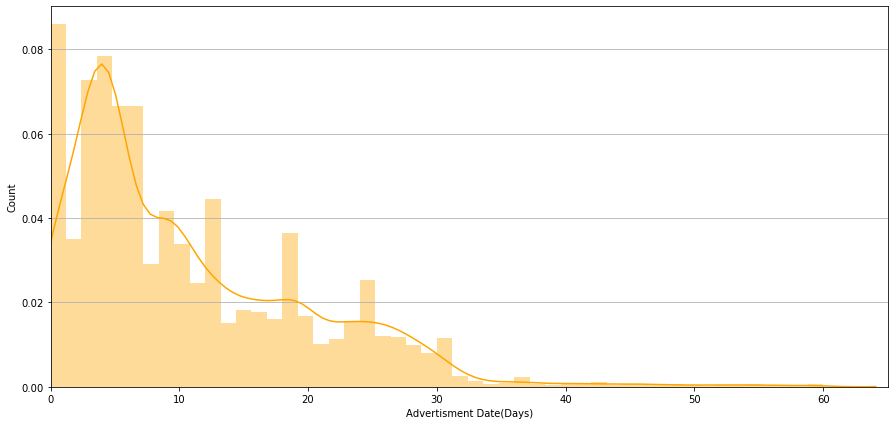

In [16]:
fig, ax = plt.subplots(figsize=[15,7])
ax = sns.distplot(data_frame["last_edit"], color='orange')
plt.xlim([0,65])
ax.grid(axis='y')
plt.xlabel("Advertisment Date(Days)")
plt.ylabel("Count")
plt.show()

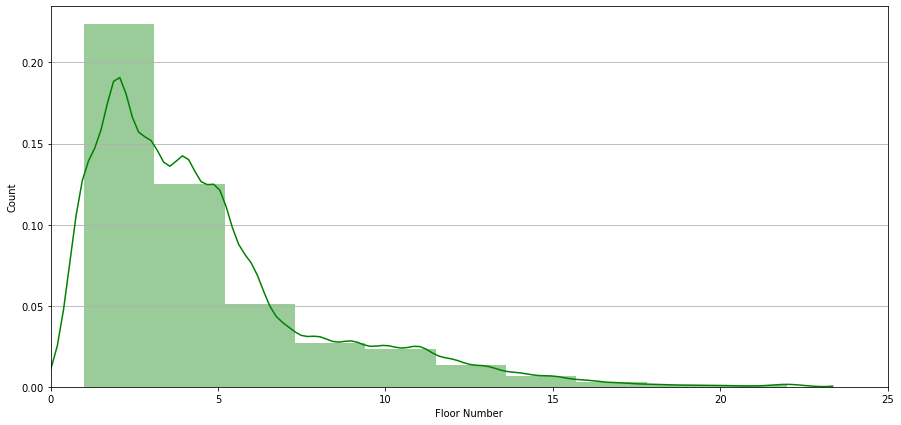

In [17]:
fig, ax = plt.subplots(figsize=[15,7])
ax = sns.distplot(data_frame["prop_floor"], bins=10, color='g')
plt.xlim([0,25])
ax.grid(axis='y')
plt.xlabel("Floor Number")
plt.ylabel("Count")
plt.show()

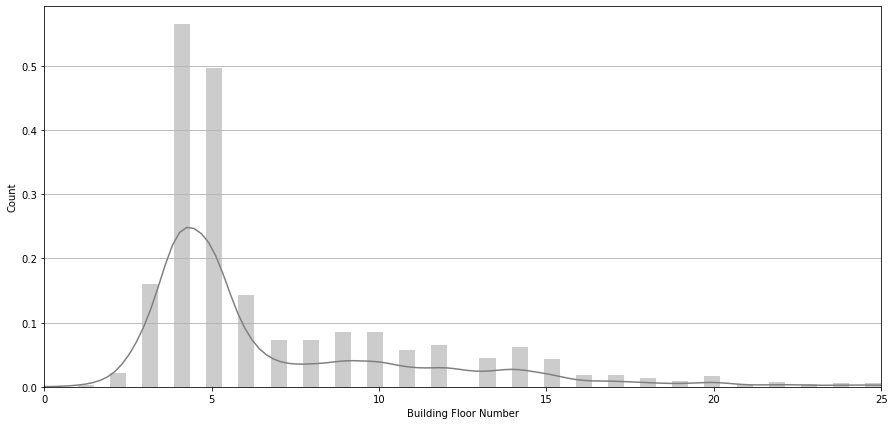

In [18]:
fig, ax = plt.subplots(figsize=[15,7])
ax = sns.distplot(data_frame["building_floors"], color='grey')
plt.xlim([0,25])
ax.grid(axis='y')
plt.xlabel("Building Floor Number")
plt.ylabel("Count")
plt.show()

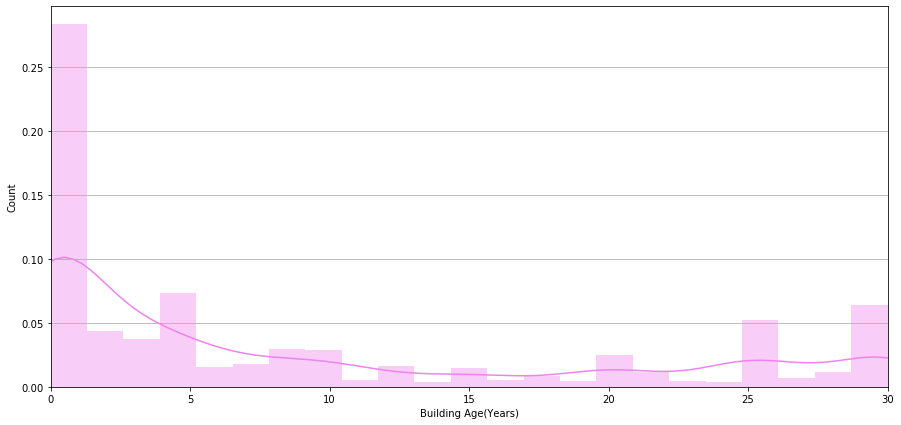

In [19]:
fig, ax = plt.subplots(figsize=[15,7])
ax = sns.distplot(data_frame["building_age"], color='violet')
plt.xlim([0,30])
ax.grid(axis='y')
plt.xlabel("Building Age(Years)")
plt.ylabel("Count")
plt.show()

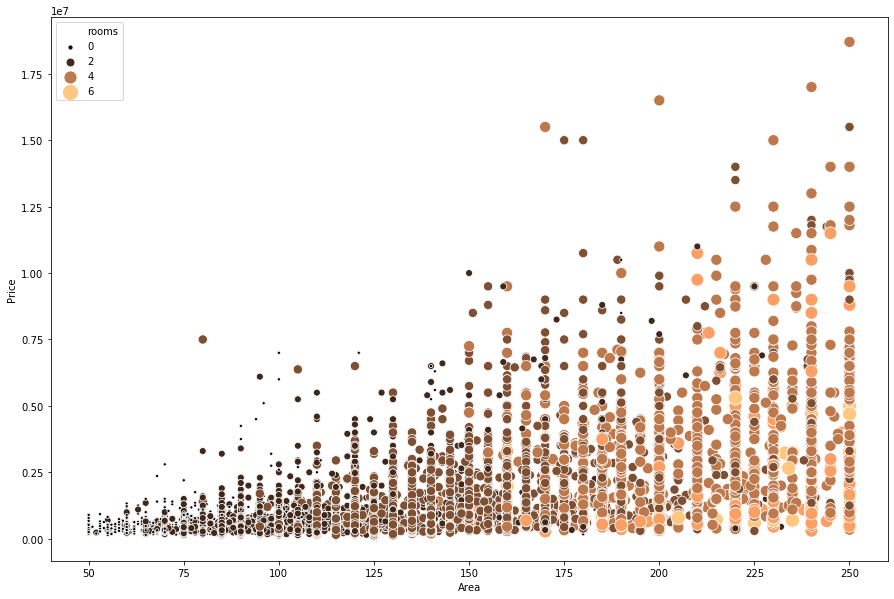

In [20]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="area", y="price",
                     hue="rooms", size ="rooms",
                     palette='copper', sizes=(10, 200),
                     data=data_frame)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

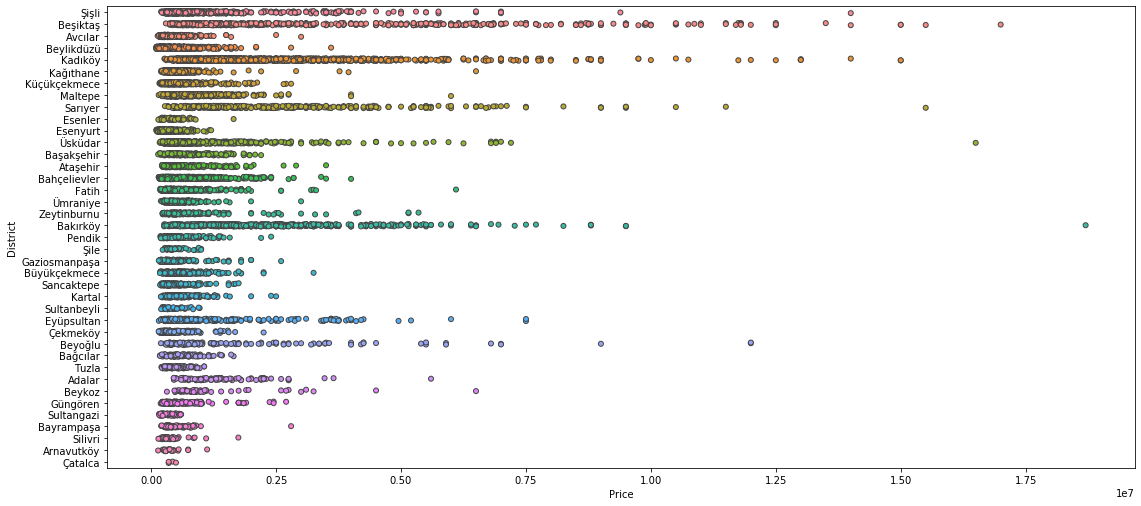

In [21]:
fig, ax = plt.subplots(figsize=[15,7])
plt.tight_layout() 
ax=sns.stripplot(x ="price", y ="district", jitter=True, linewidth=1, data=data_frame)

plt.xlabel("Price")
plt.ylabel("District")
plt.show()

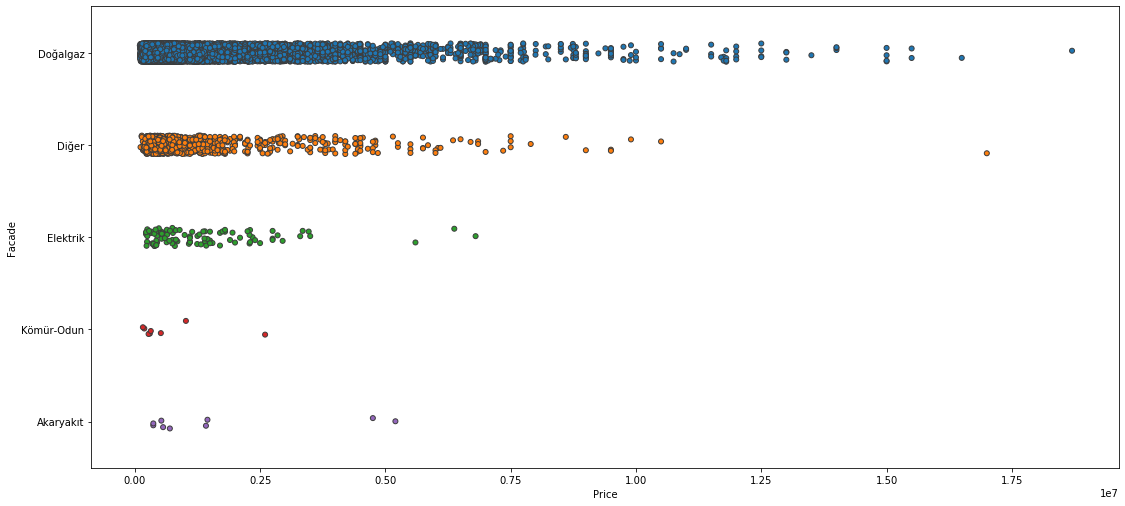

In [22]:
fig, ax = plt.subplots(figsize=[15,7])
plt.tight_layout() 
a=sns.stripplot(x ="price", y ="fuel_type", jitter=True, linewidth=1, data=data_frame)

plt.xlabel("Price")
plt.ylabel("Facade")
plt.show()

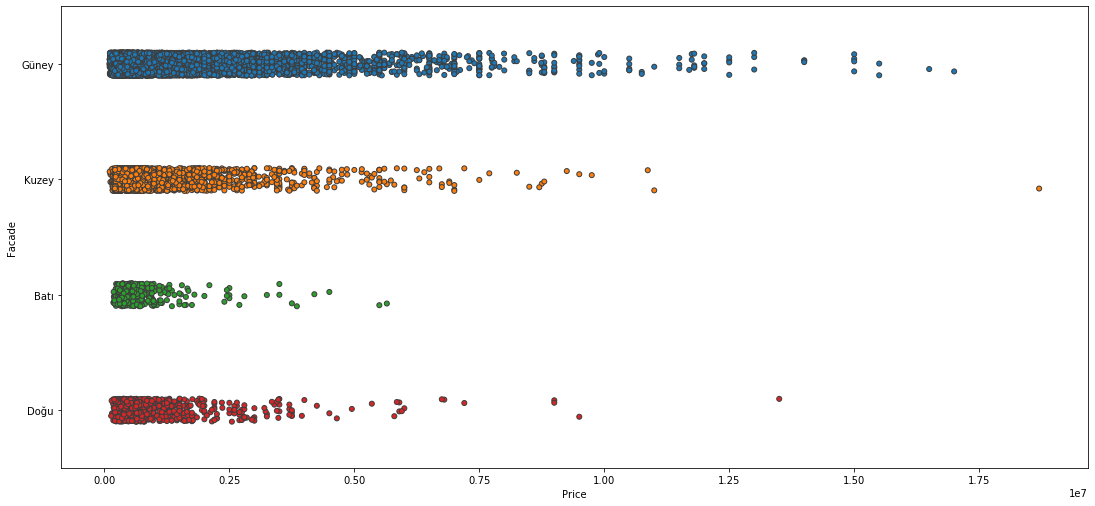

In [23]:
fig, ax = plt.subplots(figsize=[15,7])
plt.tight_layout() 
a=sns.stripplot(x ="price", y ="facade", jitter=True, linewidth=1, data=data_frame)

plt.xlabel("Price")
plt.ylabel("Facade")
plt.show()

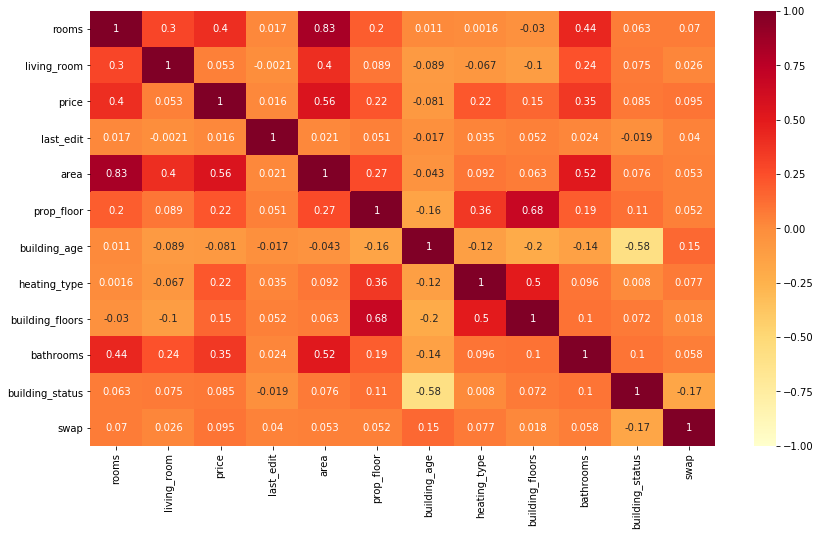

In [24]:
num_subdata_frame = data_frame.select_dtypes([np.number])
sns.heatmap(num_subdata_frame.corr(), -1, +1, annot=True, cmap='YlOrRd')

In [25]:
#'rooms', 'area', 'building_floors', 'bathrooms','heating_type', 'swap', 'fuel_type', 'building_status'
base_input_cols = ['rooms', 'area', 'building_floors', 'bathrooms','heating_type', 'swap']
base_output_col = 'price'

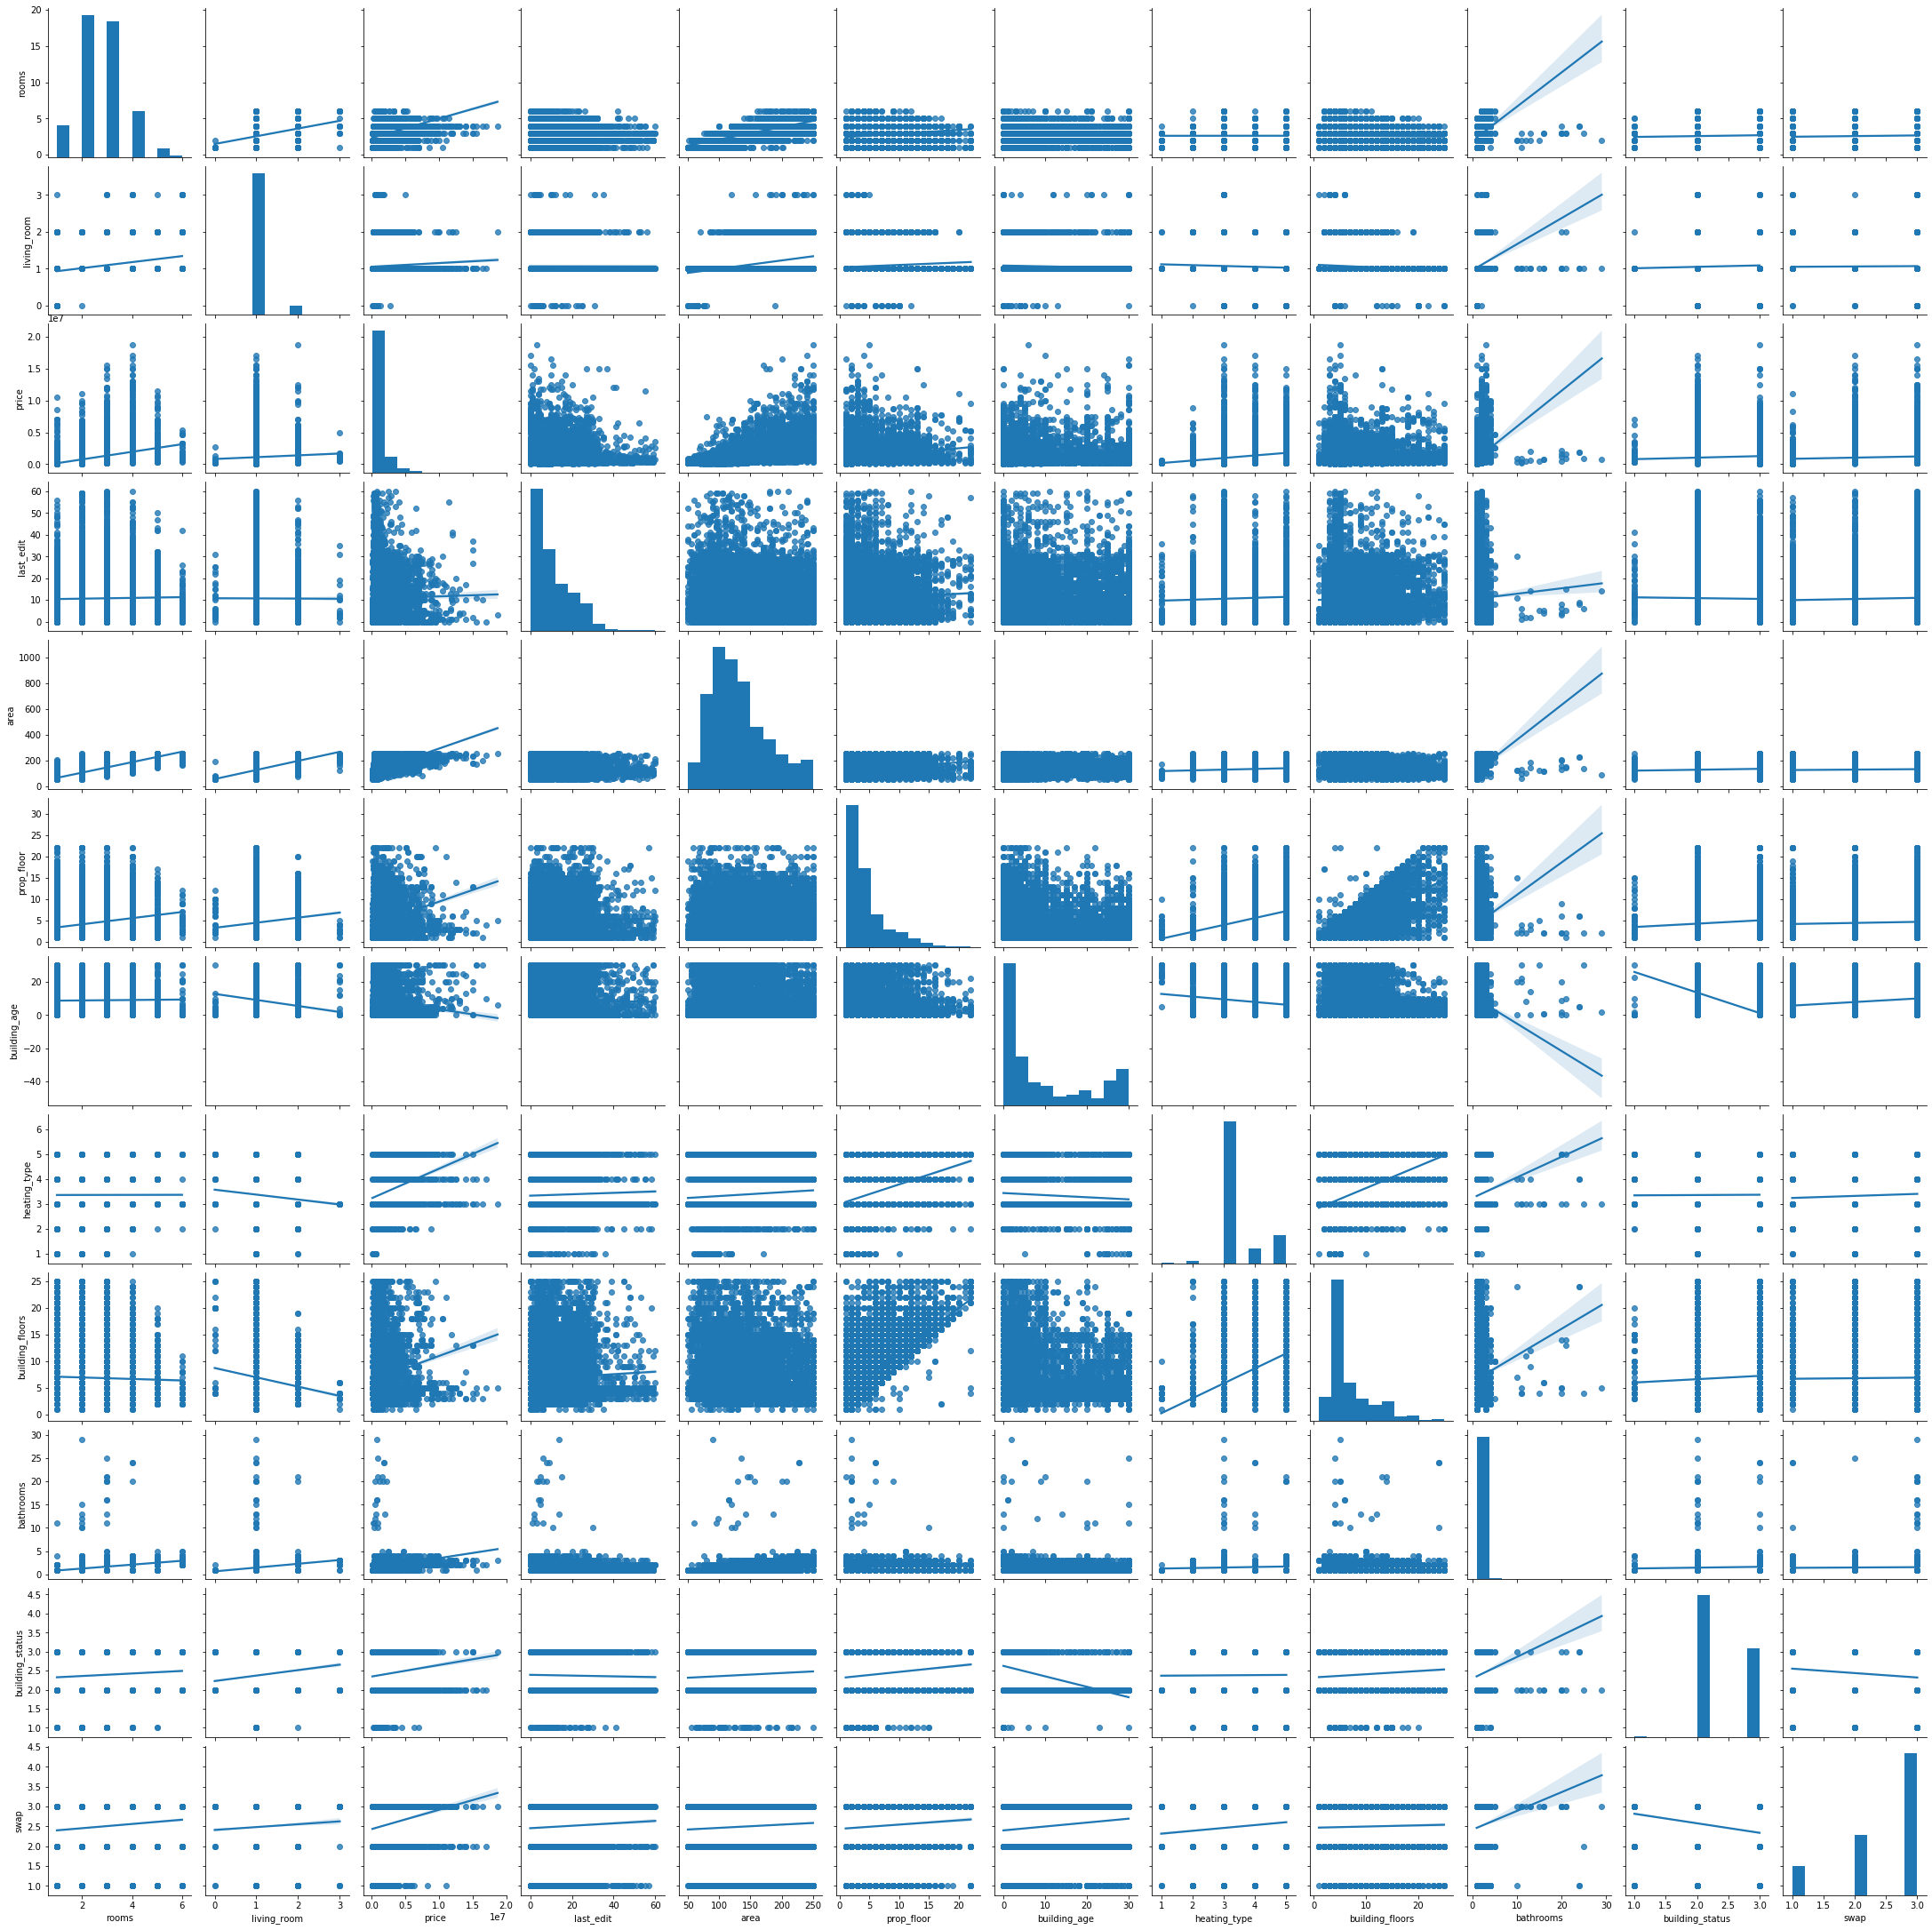

In [26]:
sns.pairplot(num_subdata_frame, kind="reg")

In [27]:
import statsmodels.api as sm

model = sm.OLS(num_subdata_frame[base_output_col], num_subdata_frame[base_input_cols])
results = model.fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.574
Model:                            OLS   Adj. R-squared (uncentered):              0.574
Method:                 Least Squares   F-statistic:                              3584.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                        0.00
Time:                        19:44:23   Log-Likelihood:                     -2.4578e+05
No. Observations:               15974   AIC:                                  4.916e+05
Df Residuals:                   15968   BIC:                                  4.916e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
rooms           -3.821e+05   1.78e+04    -21.488      0.000   -4.17e+05   -3.47e+05
area             1.886e+04    386.071     48.852      0.000    1.81e+04    1.96e+04
building_floors  1.794e+04   2490.327      7.205      0.000    1.31e+04    2.28e+04
bathrooms        1.264e+05   1.24e+04     10.166      0.000    1.02e+05    1.51e+05
heating_type     -8.44e+04   1.11e+04     -7.635      0.000   -1.06e+05   -6.27e+04
swap            -1.187e+05   1.14e+04    -10.370      0.000   -1.41e+05   -9.63e+04
==============================================================================
Omnibus:                    13205.908   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           489276.709
Skew:                           3.778   Prob(JB):                         0.00
Kurtosis:                      29.039   Cond. No.                         268.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = num_subdata_frame[base_input_cols]
y = num_subdata_frame[base_output_col]

folds = KFold(n_splits=10, shuffle=True, random_state = 50) # people choose 10

In [30]:
#Linear Regression
linear_mean = np.mean(cross_val_score(LinearRegression(),X,y,cv=folds,scoring='r2'))
print(f'Linear Regression Cross Validation R^2 Mean: {linear_mean:.3f}')

Linear Regression Cross Validation R^2 Mean: 0.352


In [31]:
#Ridge Polynominal
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.values)

ridge_mean = np.mean(cross_val_score(Ridge(alpha=10),X_poly,y,cv=folds,scoring='r2'))
print(f'Ridge Cross Validation R^2 Mean: {ridge_mean:.3f}')

Ridge Cross Validation R^2 Mean: 0.394


In [32]:
#Lasso
lasso_mean = np.mean(cross_val_score(Lasso(alpha=0.5),X,y,cv=folds,scoring='r2'))
print(f'Lasso Cross Validation R^2 Mean: {lasso_mean:.3f}')

Lasso Cross Validation R^2 Mean: 0.352


In [33]:
one_hot = pd.get_dummies(data_frame[['district', 'furniture_availability']])
num_subdata_frame = num_subdata_frame.join(one_hot)
num_subdata_frame.columns

Index(['rooms', 'living_room', 'price', 'last_edit', 'area', 'prop_floor',
       'building_age', 'heating_type', 'building_floors', 'bathrooms',
       'building_status', 'swap', 'district_Adalar', 'district_Arnavutköy',
       'district_Ataşehir', 'district_Avcılar', 'district_Bahçelievler',
       'district_Bakırköy', 'district_Bayrampaşa', 'district_Bağcılar',
       'district_Başakşehir', 'district_Beykoz', 'district_Beylikdüzü',
       'district_Beyoğlu', 'district_Beşiktaş', 'district_Büyükçekmece',
       'district_Esenler', 'district_Esenyurt', 'district_Eyüpsultan',
       'district_Fatih', 'district_Gaziosmanpaşa', 'district_Güngören',
       'district_Kadıköy', 'district_Kartal', 'district_Kağıthane',
       'district_Küçükçekmece', 'district_Maltepe', 'district_Pendik',
       'district_Sancaktepe', 'district_Sarıyer', 'district_Silivri',
       'district_Sultanbeyli', 'district_Sultangazi', 'district_Tuzla',
       'district_Zeytinburnu', 'district_Çatalca', 'district_Çek

In [34]:
num_subdata_frame['log_price'] = np.log(num_subdata_frame.price)
updated_input_columns = ['rooms', 'area', 'prop_floor', 'building_floors', 'bathrooms', 'heating_type', 'swap', 'building_status', 'district_Adalar', 'district_Arnavutköy',
                         'district_Ataşehir', 'district_Avcılar', 'district_Bahçelievler', 'district_Bakırköy', 'district_Bayrampaşa',
                         'district_Bağcılar', 'district_Başakşehir', 'district_Beykoz', 'district_Beylikdüzü', 'district_Beyoğlu',
                         'district_Beşiktaş', 'district_Büyükçekmece', 'district_Esenler', 'district_Esenyurt', 'district_Eyüpsultan',
                         'district_Fatih', 'district_Gaziosmanpaşa', 'district_Güngören', 'district_Kadıköy', 'district_Kartal',
                         'district_Kağıthane', 'district_Küçükçekmece', 'district_Maltepe', 'district_Pendik', 'district_Sancaktepe',
                         'district_Sarıyer', 'district_Silivri', 'district_Sultanbeyli', 'district_Sultangazi', 'district_Tuzla',
                         'district_Zeytinburnu', 'district_Çatalca', 'district_Çekmeköy', 'district_Ümraniye', 'district_Üsküdar',
                         'district_Şile', 'district_Şişli']
updated_output_column = 'log_price'

In [35]:
X_updated = num_subdata_frame[updated_input_columns]
y_updated = num_subdata_frame[updated_output_column]

folds = KFold(n_splits=10, shuffle=True, random_state = 50) # people choose 10

In [36]:
#Linear Regression
linear_mean_updated = np.mean(cross_val_score(LinearRegression(),X_updated,y_updated,cv=folds,scoring='r2'))
print(f'Linear Regression Cross Validation R^2 Mean: {linear_mean_updated:.3f}')

Linear Regression Cross Validation R^2 Mean: 0.782


In [37]:
#Ridge Polynomial
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_updated.values)

ridge_mean_updated = np.mean(cross_val_score(Ridge(alpha=10),X_train_poly,y_updated,cv=folds,scoring='r2'))
print(f'Ridge Cross Validation R^2 Mean: {ridge_mean_updated:.3f}')

Ridge Cross Validation R^2 Mean: 0.822


In [38]:
#Lasso
lasso_mean_updated = np.mean(cross_val_score(Lasso(alpha=1),X_updated,y_updated,cv=folds,scoring='r2'))
print(f'Lasso Cross Validation R^2 Mean: {lasso_mean_updated:.3f}')

Lasso Cross Validation R^2 Mean: 0.424


In [39]:
#Parameter Tuning
for i, value in enumerate(range(1,21)):
    ridge_mean_updated = np.mean(cross_val_score(Ridge(alpha=value),X_train_poly,y_updated,cv=folds,scoring='r2'))
    print(f'{i+1}. Ridge Cross Validation R^2 Mean: {ridge_mean_updated:.3f}')

1. Ridge Cross Validation R^2 Mean: 0.822
2. Ridge Cross Validation R^2 Mean: 0.822
3. Ridge Cross Validation R^2 Mean: 0.822
4. Ridge Cross Validation R^2 Mean: 0.822
5. Ridge Cross Validation R^2 Mean: 0.822
6. Ridge Cross Validation R^2 Mean: 0.822
7. Ridge Cross Validation R^2 Mean: 0.822
8. Ridge Cross Validation R^2 Mean: 0.822
9. Ridge Cross Validation R^2 Mean: 0.822
10. Ridge Cross Validation R^2 Mean: 0.822
11. Ridge Cross Validation R^2 Mean: 0.822
12. Ridge Cross Validation R^2 Mean: 0.822
13. Ridge Cross Validation R^2 Mean: 0.822
14. Ridge Cross Validation R^2 Mean: 0.822
15. Ridge Cross Validation R^2 Mean: 0.822
16. Ridge Cross Validation R^2 Mean: 0.822
17. Ridge Cross Validation R^2 Mean: 0.822
18. Ridge Cross Validation R^2 Mean: 0.822
19. Ridge Cross Validation R^2 Mean: 0.822
20. Ridge Cross Validation R^2 Mean: 0.822


In [40]:
import scipy.stats as stats

def graphs_polyri(X,y):
    X, X_test, y, y_test = train_test_split(X, y, test_size = .2, random_state = 50)
    
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X.values)
    X_test_poly = poly.transform(X_test.values)
    
    lm_poly_ri = Ridge(alpha=10)
    lm_poly_ri.fit(X_train_poly, y)
    y_pred = lm_poly_ri.predict(X_test_poly)
    
    
    
    plt.figure(figsize=[17,5])
    
    #reg fit plot
    plt.subplot(1, 2, 1)
    sns.regplot(y_test, y_pred,color='orange')
    #plt.title('Tahmin Değerleri vs. Gerçek değerler', fontsize=22)
    plt.title("Regression Fit")
    plt.xlabel('Gerçek Değerler')
    plt.ylabel('Tahmin Değerleri')
    
    #residual plot
    plt.subplot(1, 2, 2)
    res = y_test - y_pred
    plt.scatter(y_pred, res, alpha=.3)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    return res 

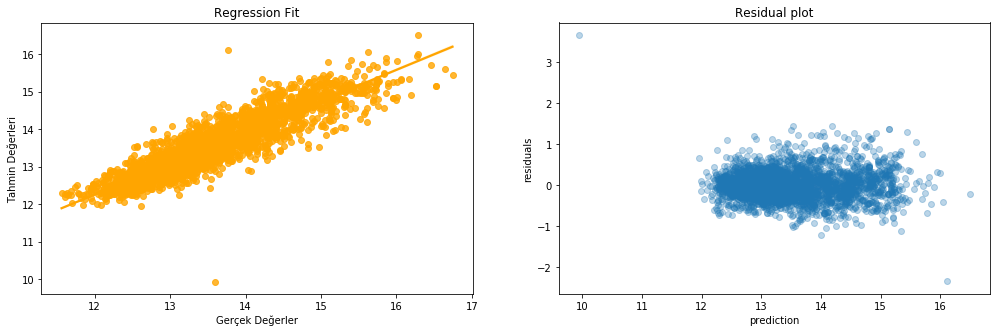

In [41]:
res = graphs_polyri(X_updated,y_updated)

Text(0.5, 1.0, 'Normal Q-Q plot')

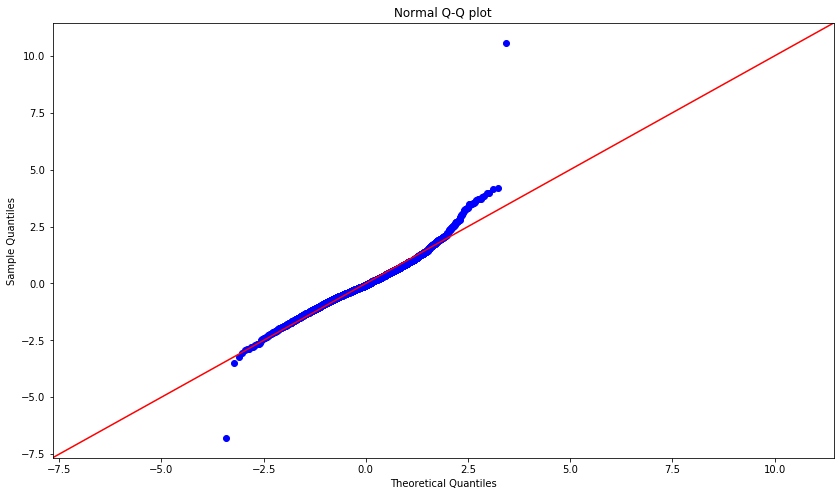

In [42]:
#Q-Q plot
sm.qqplot(res,fit=True,line='45') 
plt.title("Normal Q-Q plot")